In [19]:
import pandas as pd
import scipy
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.preprocessing import LabelEncoder
import numpy as np

import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.preprocessing import StandardScaler


from sklearn.neural_network import MLPClassifier
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import RandomizedSearchCV

In [2]:
depression_data = pd.read_csv("student_depression_dataset.csv")

In [3]:
depression_data

,id,Gender,Age,City,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,2,Male,33.0,Visakhapatnam,Student,5.0,0.0,8.97,2.0,0.0,'5-6 hours',Healthy,B.Pharm,Yes,3.0,1.0,No,1
1,8,Female,24.0,Bangalore,Student,2.0,0.0,5.90,5.0,0.0,'5-6 hours',Moderate,BSc,No,3.0,2.0,Yes,0
2,26,Male,31.0,Srinagar,Student,3.0,0.0,7.03,5.0,0.0,'Less than 5 hours',Healthy,BA,No,9.0,1.0,Yes,0
3,30,Female,28.0,Varanasi,Student,3.0,0.0,5.59,2.0,0.0,'7-8 hours',Moderate,BCA,Yes,4.0,5.0,Yes,1
4,32,Female,25.0,Jaipur,Student,4.0,0.0,8.13,3.0,0.0,'5-6 hours',Moderate,M.Tech,Yes,1.0,1.0,No,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27896,140685,Female,27.0,Surat,Student,5.0,0.0,5.75,5.0,0.0,'5-6 hours',Unhealthy,'Class 12',Yes,7.0,1.0,Yes,0
27897,140686,Male,27.0,Ludhiana,Student,2.0,0.0,9.40,3.0,0.0,'Less than 5 hours',Healthy,MSc,No,0.0,3.0,Yes,0
27898,140689,Male,31.0,Faridabad,Student,3.0,0.0,6.61,4.0,0.0,'5-6 hours',Unhealthy,MD,No,12.0,2.0,No,0
27899,140690,Female,18.0,Ludhiana,Student,5.0,0.0,6.88,2.0,0.0,'Less than 5 hours',Healthy,'Class 12',Yes,10.0,5.0,No,1


In [4]:
depression_data.describe

<bound method NDFrame.describe of            id  Gender   Age           City Profession  Academic Pressure  \
0           2    Male  33.0  Visakhapatnam    Student                5.0   
1           8  Female  24.0      Bangalore    Student                2.0   
2          26    Male  31.0       Srinagar    Student                3.0   
3          30  Female  28.0       Varanasi    Student                3.0   
4          32  Female  25.0         Jaipur    Student                4.0   
...       ...     ...   ...            ...        ...                ...   
27896  140685  Female  27.0          Surat    Student                5.0   
27897  140686    Male  27.0       Ludhiana    Student                2.0   
27898  140689    Male  31.0      Faridabad    Student                3.0   
27899  140690  Female  18.0       Ludhiana    Student                5.0   
27900  140699    Male  27.0          Patna    Student                4.0   

       Work Pressure  CGPA  Study Satisfaction  Job S

In [5]:
depression_data.corr(numeric_only=True)

,id,Age,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Work/Study Hours,Depression
id,1.000000,0.003783,0.005172,0.001261,-0.012324,0.007794,0.001931,-0.004466,0.000923
Age,0.003783,1.000000,-0.075803,0.002015,0.005056,0.009235,-0.000432,-0.032928,-0.226422
Academic Pressure,0.005172,-0.075803,1.000000,-0.022231,-0.022239,-0.110988,-0.024945,0.095970,0.474835
Work Pressure,0.001261,0.002015,-0.022231,1.000000,-0.050896,-0.021145,0.770652,-0.005468,-0.003351
CGPA,-0.012324,0.005056,-0.022239,-0.050896,1.000000,-0.044062,-0.053631,0.002604,0.022210
Study Satisfaction,0.007794,0.009235,-0.110988,-0.021145,-0.044062,1.000000,-0.021907,-0.036441,-0.167971
Job Satisfaction,0.001931,-0.000432,-0.024945,0.770652,-0.053631,-0.021907,1.000000,-0.005222,-0.003482
Work/Study Hours,-0.004466,-0.032928,0.095970,-0.005468,0.002604,-0.036441,-0.005222,1.000000,0.208563
Depression,0.000923,-0.226422,0.474835,-0.003351,0.022210,-0.167971,-0.003482,0.208563,1.000000


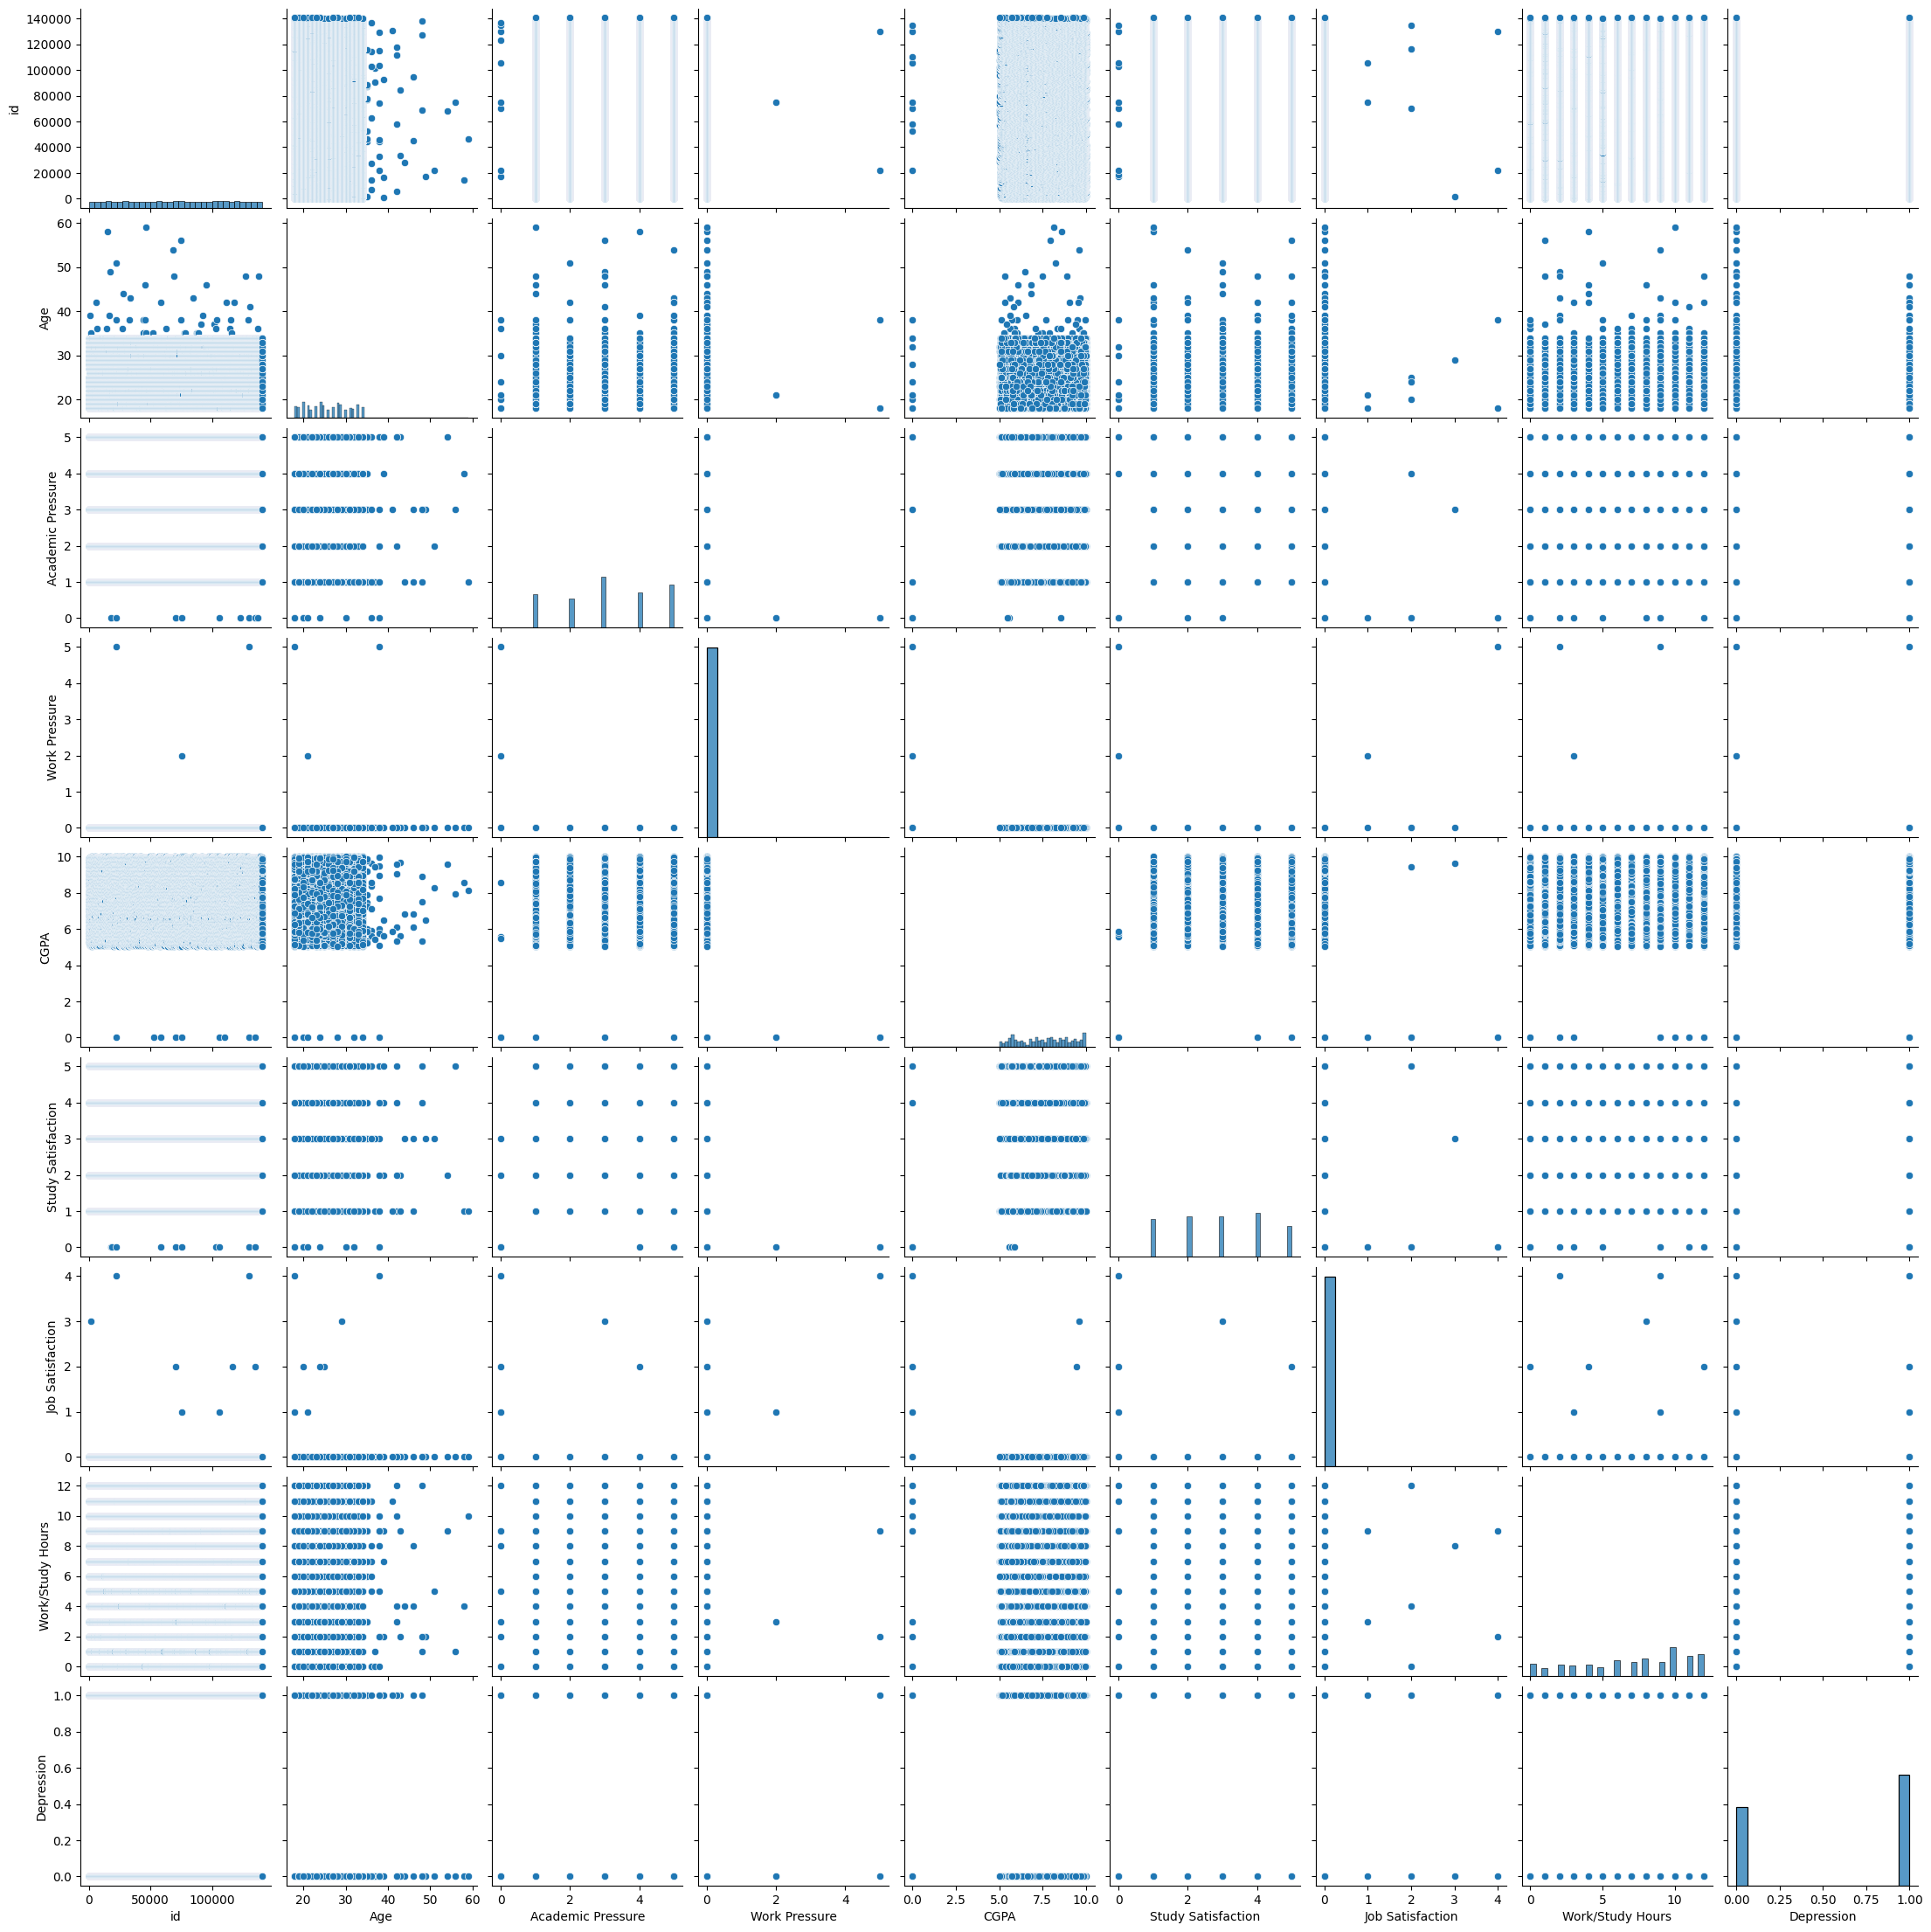

In [9]:
sns.pairplot(depression_data)

In [11]:
depression_data.columns

Index(['id', 'Gender', 'Age', 'City', 'Profession', 'Academic Pressure',
       'Work Pressure', 'CGPA', 'Study Satisfaction', 'Job Satisfaction',
       'Sleep Duration', 'Dietary Habits', 'Degree',
       'Have you ever had suicidal thoughts ?', 'Work/Study Hours',
       'Financial Stress', 'Family History of Mental Illness', 'Depression'],
      dtype='object')

In [24]:
depression_data = depression_data.replace("?", np.nan).dropna()

In [23]:
le = LabelEncoder()
depression_data["Sleep Duration Codes"] = le.fit_transform(depression_data["Sleep Duration"])

In [46]:
le = LabelEncoder()
depression_data["Dietary Habits Codes"] = le.fit_transform(depression_data["Dietary Habits"])

In [28]:
random_search = RandomizedSearchCV(mlp_classify, params_options, n_iter = 10, scoring = "r2", cv=2)


In [50]:
X = depression_data[["Academic Pressure", "Study Satisfaction", "Financial Stress", "Sleep Duration Codes", "Dietary Habits Codes"]]
y = depression_data["Depression"]

scaler = StandardScaler()
X = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2)

mlp_classify = MLPClassifier()

params_options = { #dictionary
    "hidden_layer_sizes": [[50], [10,10], [100,100,100], [100, 50, 25]],
    "activation": ["tanh", "relu", "identity", "logistic"],
    "max_iter": [1000, 2000, 5000, 10000]
}
random_search = RandomizedSearchCV(estimator=mlp_classify, param_distributions=params_options, n_iter=10, cv=5,n_jobs=-1,refit=True)


random_search.fit(X_train, y_train)

y_pred= random_search.predict(X_test)
print("Best Accuracy:", accuracy_score(y_pred, y_test)*100)

Best Accuracy: 77.58064516129032


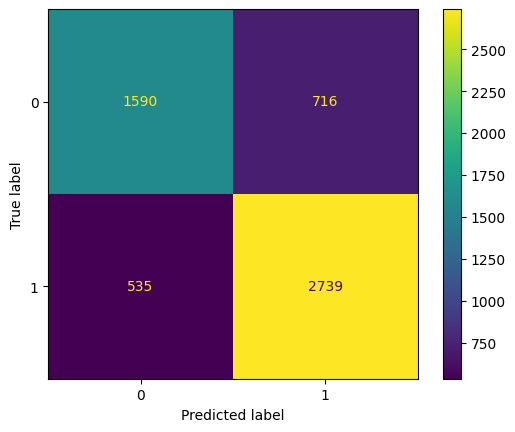

In [51]:
ConfusionMatrixDisplay.from_estimator(random_search, X_test, y_test)

In [42]:
pivot_table = pd.crosstab(depression_data['Dietary Habits'],
                          depression_data['Depression'])
pivot_table

Depression,0,1
Dietary Habits,,
Healthy,4177,3472
Moderate,4363,5558
Others,4,8
Unhealthy,3019,7297


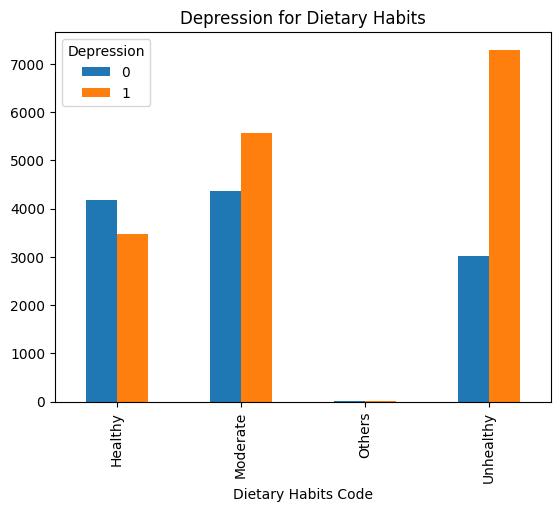

In [49]:
pivot_table.plot(kind="bar")
plt.title("Depression for Dietary Habits")
plt.xlabel("Dietary Habits Code")

plt.show()

In [44]:
print(scipy.stats.chi2_contingency(pivot_table))

Chi2ContingencyResult(statistic=np.float64(1203.26724929502), pvalue=np.float64(1.4332378809995891e-260), dof=3, expected_freq=array([[3.17031282e+03, 4.47868718e+03],
       [4.11199810e+03, 5.80900190e+03],
       [4.97368987e+00, 7.02631013e+00],
       [4.27571539e+03, 6.04028461e+03]]))


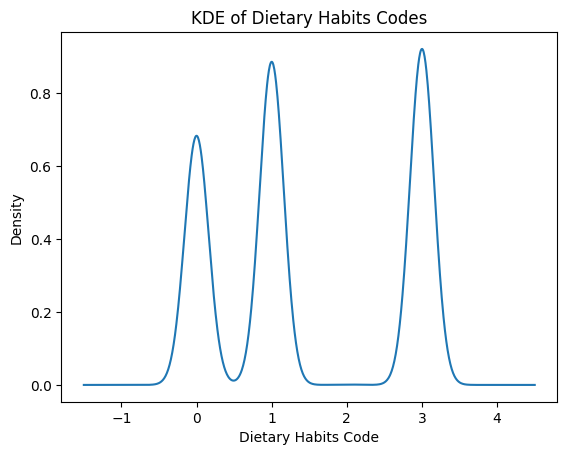

In [48]:
depression_data['Dietary Habits Codes'].plot(kind='kde')

plt.title("KDE of Dietary Habits Codes")
plt.xlabel("Dietary Habits Code")
plt.ylabel("Density")
plt.show()